In [67]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
%matplotlib inline
df=pd.read_csv('Data.csv',header=0,sep=',')
mycolors = ['#002856', '#EAC71B']
df.drop(columns = df.columns[0], inplace=True)
df.drop(columns=df.columns[0], inplace=True)

In [65]:
df.info()
df.duplicated().sum()# test for duplicated lines 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             2567 non-null   int64  
 1   Name           2567 non-null   object 
 2   Team           2567 non-null   object 
 3   GP             2567 non-null   int64  
 4   Minute         2567 non-null   float64
 5   Points         2567 non-null   float64
 6   FGM            2567 non-null   float64
 7   FGA            2567 non-null   float64
 8   FG_P           2567 non-null   float64
 9   3PM            2567 non-null   float64
 10  3PA            2567 non-null   float64
 11  3P%            2567 non-null   float64
 12  FTM            2567 non-null   float64
 13  FTA            2567 non-null   float64
 14  FT%            2567 non-null   float64
 15  OREB           2567 non-null   float64
 16  DREB           2567 non-null   float64
 17  REB            2567 non-null   float64
 18  AST     

0

(array([ 30.,  40.,  36.,  56.,  52.,  39.,   9.,   0.,   0.,   0.,   1.,
          3.,   5.,  31.,  32.,  42.,  93., 120., 156.,  81., 156., 179.,
        180., 152., 199., 172., 172., 163., 224., 144.]),
 array([26. , 27.9, 29.8, 31.7, 33.6, 35.5, 37.4, 39.3, 41.2, 43.1, 45. ,
        46.9, 48.8, 50.7, 52.6, 54.5, 56.4, 58.3, 60.2, 62.1, 64. , 65.9,
        67.8, 69.7, 71.6, 73.5, 75.4, 77.3, 79.2, 81.1, 83. ]),
 <BarContainer object of 30 artists>)

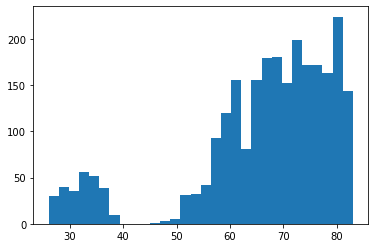

In [62]:
plt.hist(df["GP"],bins=30)#שכיחות כמות משחקים ששוחקו ביחס לכמות מופעים 


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  2.,  3.,  2.,
         6.,  1.,  2.,  3.,  4.,  5., 10.,  7., 15., 10., 13.,  7.,  9.,
        22., 20., 27., 18., 24., 35., 27., 29., 36., 31., 44., 26., 27.,
        41., 33., 39., 51., 26., 46., 35., 32., 33., 33., 38., 27., 32.,
        49., 28., 41., 25., 31., 45., 39., 34., 47., 37., 36., 51., 35.,
        37., 47., 33., 61., 33., 38., 37., 31., 50., 29., 36., 53., 31.,
        54., 37., 43., 45., 34., 37., 43., 42., 47., 35., 31., 39., 22.,
        30., 29., 15., 19.,  2.,  4.,  5.,  2.,  4.]),
 array([ 4.9  ,  5.238,  5.576,  5.914,  6.252,  6.59 ,  6.928,  7.266,
         7.604,  7.942,  8.28 ,  8.618,  8.956,  9.294,  9.632,  9.97 ,
        10.308, 10.646, 10.984, 11.322, 11.66 , 11.998, 12.336, 12.674,
        13.012, 13.35 , 13.688, 14.026, 14.364, 14.702, 15.04 , 15.378,
        15.716, 16.054, 16.392, 16.73 , 17.068, 17.406, 17.744, 18.082,
        18.42 , 18.758, 19.096, 19.434, 19.772, 20.11 , 20.448, 20.786,
  

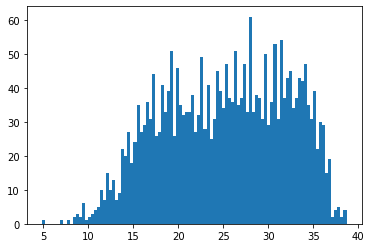

In [63]:
plt.hist(df["Minute"],bins=100)#שכיחות של דקות משחק ביחס לכמות למופעים

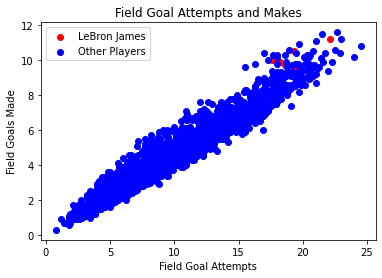

In [39]:

# Select only the rows of the dataframe that correspond to the player you want to plot in a different color
player_df = df[df['Name'] == 'LeBron James']

# Extract the FGA and FGM columns from the dataframe
FGA = player_df['FGA']
FGM = player_df['FGM']

# Create a scatter plot for the player you want to plot in a different color
plt.scatter(FGA, FGM, c='red', label='LeBron James')

# Select all the rows of the dataframe except for the player you want to plot in a different color
other_players_df = df[df['Name'] != 'LeBron James']

# Extract the FGA and FGM columns from the dataframe
FGA = other_players_df['FGA']
FGM = other_players_df['FGM']

# Create a scatter plot for the other players
plt.scatter(FGA, FGM, c='blue', label='Other Players')

# Add a title and axis labels
plt.title('Field Goal Attempts and Makes')
plt.xlabel('Field Goal Attempts')
plt.ylabel('Field Goals Made')

# Add a legend
plt.legend()

# Show the plot
plt.show()



In [40]:
# אפשר לחשב E[X] עי כמות זריקות לחלק כמות קליעות כפול סיגמה שרצה על כמות השחקנים  
#נחשב הסתברות לבחירת שחקן שקלע למעלה מ11 קליעות במשחק
df.FGM[df.FGM>10].count()/df.FGM.count()

0.01090767432800935

In [41]:
#sns.boxplot(df.GP)
df.describe(include='all')

,Unnamed: 0.1,Unnamed: 0,ID,Name,Team,GP,Minute,Points,FGM,FGA,...,DREB,REB,AST,STL,BLK,TOV,EFF,BIO,Season Number,ASP
count,2567.000000,2567.000000,2567.000000,2567,2567,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,...,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567,2567.000000,2567.000000
unique,NaN,NaN,NaN,741,30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,310,NaN,NaN
top,NaN,NaN,NaN,Harrison Barnes,SAS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non,NaN,NaN
freq,NaN,NaN,NaN,10,101,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1176,NaN,NaN
mean,1283.000000,1283.000000,129.189326,NaN,NaN,66.133619,25.213635,11.450604,4.227152,9.136424,...,3.521387,4.589014,2.499961,0.803350,0.499649,1.430541,12.944916,NaN,5.585898,0.073627
std,741.173394,741.173394,74.697358,NaN,NaN,13.847420,6.848963,5.928296,2.097149,4.426886,...,1.795745,2.466582,1.927587,0.390241,0.445297,0.800678,6.009578,NaN,2.867210,0.261213
min,0.000000,0.000000,1.000000,NaN,NaN,26.000000,4.900000,1.000000,0.300000,0.800000,...,0.500000,0.700000,0.100000,0.100000,0.000000,0.200000,1.300000,NaN,1.000000,0.000000
25%,641.500000,641.500000,65.000000,NaN,NaN,61.000000,19.550000,7.000000,2.700000,5.700000,...,2.200000,2.800000,1.100000,0.500000,0.200000,0.800000,8.600000,NaN,3.000000,0.000000
50%,1283.000000,1283.000000,129.000000,NaN,NaN,69.000000,25.600000,10.100000,3.700000,8.200000,...,3.100000,4.000000,1.800000,0.700000,0.400000,1.300000,11.800000,NaN,6.000000,0.000000
75%,1924.500000,1924.500000,193.000000,NaN,NaN,76.000000,31.000000,14.600000,5.500000,11.800000,...,4.300000,5.700000,3.300000,1.000000,0.600000,1.800000,16.100000,NaN,8.000000,0.000000


In [42]:
bins=[0,10,20,30,40]#0<x<=n
labels=[1,2,3,4]
df['EFF_binned']=pd.cut(df['EFF'],bins,labels=labels)
df['Minute_binned']=pd.cut(df['Minute'],bins,labels=labels)
df.EFF_binned.max()
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Name,Team,GP,Minute,Points,FGM,FGA,...,AST,STL,BLK,TOV,EFF,BIO,Season Number,ASP,EFF_binned,Minute_binned
0,0,0,1,Luka Doncic,DAL,34,36.9,34.2,11.6,22.7,...,8.9,1.7,0.6,3.6,36.6,non,1.0,0,4,4
1,1,1,2,Joel Embiid,PHI,27,35.4,33.2,11.1,21.0,...,4.6,1.2,1.7,3.9,34.9,PROFESSIONAL CAREER\nHolds career averages of ...,1.0,0,4,4
2,2,2,3,Giannis Antetokounmpo,MIL,30,33.7,32.1,11.5,21.5,...,5.2,0.9,0.9,3.8,32.4,PROFESSIONAL CAREER\n2018-19 NBA MVP 3-time NB...,1.0,0,4,4
3,3,3,4,Jayson Tatum,BOS,35,36.9,30.9,10.1,21.4,...,4.1,1.2,0.9,2.7,29.8,PROFESSIONAL CAREER\n2019-20: Appeared in 66 g...,1.0,0,3,4
4,4,4,5,Shai Gilgeous-Alexander,OKC,33,35.7,30.8,10.3,20.6,...,5.8,1.7,1.0,3.3,29.6,PROFESSIONAL CAREER\nLed all rookies on +.500 ...,1.0,0,3,4


(array([ 952.,    0.,    0., 1280.,    0.,    0.,  301.,    0.,    0.,
          34.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

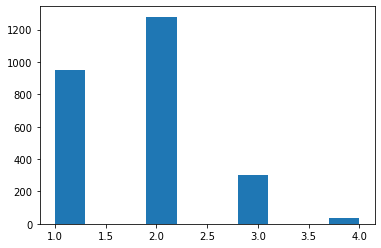

In [43]:
plt.hist(df["EFF_binned"])#EFF frequency by division into 4 groups

In [44]:
df.EFF_binned[df.EFF_binned>=4].count()/df.EFF_binned.count()#הסתברות לקבלת שחקן מקבוצה 4
df.FGM[df.EFF_binned>=4]
filtered_df = df[df.EFF_binned >= 4]
print(filtered_df)

      Unnamed: 0.1  Unnamed: 0  ID                   Name Team  GP  Minute  \
0                0           0   1            Luka Doncic  DAL  34    36.9   
1                1           1   2            Joel Embiid  PHI  27    35.4   
2                2           2   3  Giannis Antetokounmpo  MIL  30    33.7   
5                5           5   6          Stephen Curry  GSW  26    34.4   
6                6           6   7           Kevin Durant  BKN  35    36.2   
17              17          17  18           Nikola Jokic  DEN  33    33.6   
50              50          50  51       Domantas Sabonis  SAC  34    33.8   
262            262         262   1            Joel Embiid  PHI  68    33.8   
263            263         263   2  Giannis Antetokounmpo  MIL  67    32.9   
267            267         267   6           Nikola Jokic  DEN  74    33.5   
493            493         493   4            Joel Embiid  PHI  51    31.1   
494            494         494   5  Giannis Antetokounmpo  MIL  

(14074.457269978102,
 0.771321807211279,
 14200,
 array([[0.00623296, 0.00623296, 0.01246591, ..., 0.00623296, 0.00623296,
         0.00623296],
        [0.00545384, 0.00545384, 0.01090767, ..., 0.00545384, 0.00545384,
         0.00545384],
        [0.0077912 , 0.0077912 , 0.01558239, ..., 0.0077912 , 0.0077912 ,
         0.0077912 ],
        ...,
        [0.04674718, 0.04674718, 0.09349435, ..., 0.04674718, 0.04674718,
         0.04674718],
        [0.05531749, 0.05531749, 0.11063498, ..., 0.05531749, 0.05531749,
         0.05531749],
        [0.00077912, 0.00077912, 0.00155824, ..., 0.00077912, 0.00077912,
         0.00077912]]))

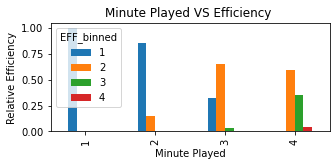

In [45]:
ct2=pd.crosstab(df['Minute_binned'],df['EFF_binned'],normalize='index')
ct1=pd.crosstab(df['GP'],df['EFF'])
ct2
ct2.plot(kind='bar',figsize=(5,2))
plt.title('Minute Played VS Efficiency ')
plt.xlabel('Minute Played')
plt.ylabel('Relative Efficiency')#מוזר לראות שכמות המשחקים ששחקן שיחק ורמת היעלות של השחקן
chi2_contingency(ct1)# אינם תלוים זה בזה על פי מבחן חי בריבוע
#ct1=pd.crosstab(df['Minute'],df['FTA'])
#chi2_contingency(ct1)

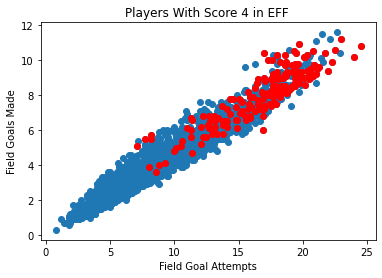

In [140]:
fig=plt.figure()
ax=plt.axes()
ax.scatter(df['FGA'], df['FGM'])
plt.title('Players With Score 4 in EFF ')
plt.xlabel('Field Goal Attempts')
plt.ylabel('Field Goals Made')
ax.scatter(df['FGA'][df.ASP==1], df['FGM'][df.ASP==1], c='red')
plt.show()

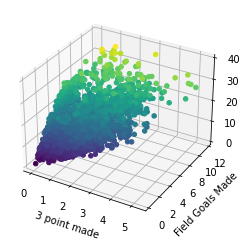

In [48]:
ax=plt.axes(projection='3d')
xdata=df['3PM']
ydata=df.FGM
zdata=df.EFF
plt.xlabel('3 point made')
plt.ylabel('Field Goals Made')
ax.scatter3D(xdata,ydata,zdata,c=zdata,depthshade=False)

In [49]:
#df[df['BIO'] == 'non']
df.BIO[df.BIO=="non"].count()

1176

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             2567 non-null   int64  
 1   Name           2567 non-null   object 
 2   Team           2567 non-null   object 
 3   GP             2567 non-null   int64  
 4   Minute         2567 non-null   float64
 5   Points         2567 non-null   float64
 6   FGM            2567 non-null   float64
 7   FGA            2567 non-null   float64
 8   FG_P           2567 non-null   float64
 9   3PM            2567 non-null   float64
 10  3PA            2567 non-null   float64
 11  3P%            2567 non-null   float64
 12  FTM            2567 non-null   float64
 13  FTA            2567 non-null   float64
 14  FT%            2567 non-null   float64
 15  OREB           2567 non-null   float64
 16  DREB           2567 non-null   float64
 17  REB            2567 non-null   float64
 18  AST     

In [108]:
m=linear_model.LinearRegression().fit(df.iloc[:,7:8],df.iloc[:,6:7])

C:\Users\eldar\AppData\Local\Temp\ipykernel_23360\3403487083.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(df['FGA'],m.predict(df.iloc[:,7:8]),'k',color='blue',linewidth=3)


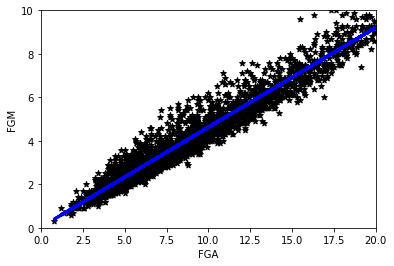

In [138]:
plt.scatter(x=df['FGA'],y= df['FGM'],c='k',marker='*',label='colors')
plt.plot(df['FGA'],m.predict(df.iloc[:,7:8]),'k',color='blue',linewidth=3)
plt.ylim(0,10)
plt.xlim(0,20)
plt.xlabel('FGA')
plt.ylabel('FGM')
plt.show()

In [113]:
def sse(Y, Y_HAT):
    sse = sum([(y - y_hat)**2 for y,y_hat in zip(Y, Y_HAT)])
    return sse

SSE = sse(df.FGM.tolist(),m.predict(df.iloc[:,7:8]).flatten())

print(SSE)

695.2833120660212


In [114]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df.FGM.tolist(),m.predict(df.iloc[:,7:8]).flatten())*len(df.FGM.tolist())

695.283312066019

In [141]:
from sklearn.metrics import r2_score

r2_score(df.FGM.tolist(),m.predict(df.iloc[:,7:8]).flatten())

0.9383906701151433

In [118]:
print("b1:",m.coef_)
print("b0:",m.intercept_)

b1: [[0.45890504]]
b0: [0.03440137]


In [134]:
m2 = linear_model.LinearRegression().fit(df.iloc[:,3:4],df.iloc[:,4:5])

C:\Users\eldar\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- GP
Feature names seen at fit time, yet now missing:
- FGA

  warnings.warn(message, FutureWarning)
C:\Users\eldar\AppData\Local\Temp\ipykernel_23360\755690668.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(df['GP'],m.predict(df.iloc[:,3:4]),'k',color='blue',linewidth=3)


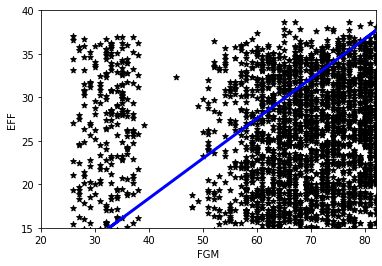

In [145]:
plt.scatter(x=df['GP'],y= df['Minute'],c='k',marker='*',label='colors')
plt.plot(df['GP'],m.predict(df.iloc[:,3:4]),'k',color='blue',linewidth=3)
plt.ylim(15,40)
plt.xlim(20,82)
plt.xlabel('FGM')
plt.ylabel('EFF')
plt.show()

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             2567 non-null   int64  
 1   Name           2567 non-null   object 
 2   Team           2567 non-null   object 
 3   GP             2567 non-null   int64  
 4   Minute         2567 non-null   float64
 5   Points         2567 non-null   float64
 6   FGM            2567 non-null   float64
 7   FGA            2567 non-null   float64
 8   FG_P           2567 non-null   float64
 9   3PM            2567 non-null   float64
 10  3PA            2567 non-null   float64
 11  3P%            2567 non-null   float64
 12  FTM            2567 non-null   float64
 13  FTA            2567 non-null   float64
 14  FT%            2567 non-null   float64
 15  OREB           2567 non-null   float64
 16  DREB           2567 non-null   float64
 17  REB            2567 non-null   float64
 18  AST     

In [142]:
df.iloc[:,7:8]

,FGA
0,22.7
1,21.0
2,21.5
3,21.4
4,20.6
...,...
2562,2.2
2563,1.2
2564,2.1
2565,1.9
